In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r"JKSE 60.csv")

In [17]:
print('JKSE\n', df)

JKSE
           Date         Open         High          Low        Close  \
0   2019-08-26  6193.230957  6230.314941  6149.020020  6214.509766   
1   2019-08-27  6244.573242  6289.884766  6223.744141  6278.170898   
2   2019-08-28  6289.650879  6306.329102  6267.194824  6281.645996   
3   2019-08-29  6288.186035  6306.895996  6276.420898  6289.119141   
4   2019-08-30  6316.119141  6329.883789  6305.037109  6328.470215   
5   2019-09-02  6331.147949  6338.112793  6281.604980  6290.545898   
6   2019-09-03  6293.361816  6310.630859  6248.796875  6261.589844   
7   2019-09-04  6266.764160  6273.604004  6239.000977  6269.664063   
8   2019-09-05  6294.283203  6307.348145  6281.954102  6306.803223   
9   2019-09-06  6329.412109  6336.912109  6305.017090  6308.950195   
10  2019-09-09  6328.282227  6333.896973  6306.735840  6326.212891   
11  2019-09-10  6331.726074  6342.005859  6311.340820  6336.672852   
12  2019-09-11  6334.591797  6381.954102  6328.687988  6381.954102   
13  2019-09-12

In [18]:
adj_close = df['Close']

In [19]:
time = np.linspace(1, len(adj_close), len(adj_close))

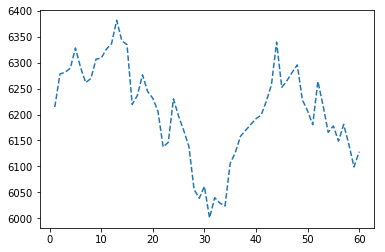

In [20]:
plt.plot(time, adj_close, label = 'IHSG', ls = '--')

In [21]:
def daily_return(adj_close):
    returns = []
    for i in range(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns = daily_return(adj_close)

mu = np.mean(returns)*252           #koef drift
sig = np.std(returns)*np.sqrt(252.) # koef diffusion

In [22]:
print(mu, sig)

-0.053688072818579236 0.10893903466761955


In [23]:
#GBM Exact Solution
#parameter
#so     : initial stock price
#mu     : koef. drift
#sig    : koef. diff.
#W      : brown motion
#T      : Time Period
#N      : number of increment

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


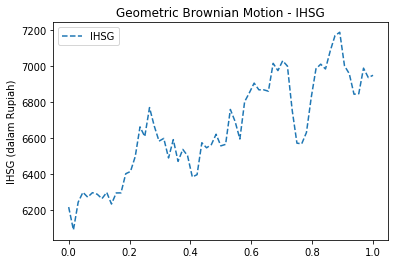

In [24]:
def brownian(seed, N):
    np.random.seed(seed)
    dt = 1./N
    b = np.random.normal(0.,1.,int(N))*np.sqrt(dt)
    W = np.cumsum(b)
    return W, b

def GBM(so, mu, sig, W, T, N):
    t = np.linspace(0., 1., N+1)
    s = []
    s.append(so)
    for i in range(1, int(N+1)):
        drift = (mu - 0.5*sig**2)*t[i]
        diffusion = sig*W[i-1]
        s_temp = so*np.exp(drift+diffusion)
        s.append(s_temp)
    return s, t

N = 2.**6
seed = 200
W = brownian(seed, N)[0]
T= 1.

so = adj_close[0] #intial value stock price
sol = GBM(so, mu, sig, W, T, N)[0]  #exact solution
t = GBM(so, mu, sig, W, T, N)[1]    #time increments for plotting

plt.plot(t, sol, label = 'IHSG', ls = '--')
plt.ylabel('IHSG (dalam Rupiah)')
plt.title('Geometric Brownian Motion - IHSG')
plt.legend(loc = 'upper left')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


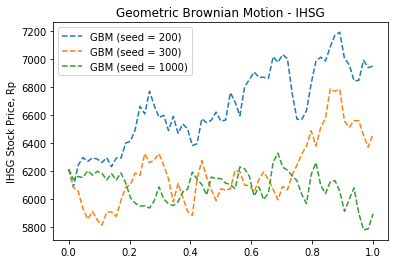

In [25]:
T = 1.
N = 2.**6
So = adj_close[0]

seed = 300
W = brownian(seed, N)[0]
sol2 = GBM(So, mu, sig, W, T, N)[0]    

seed = 1000
W = brownian(seed, N)[0]
sol3 = GBM(So, mu, sig, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

plt.plot(t, sol, label = 'GBM (seed = 200)', ls = '--')
plt.plot(t, sol2, label = 'GBM (seed = 300)', ls = '--')
plt.plot(t, sol3, label = 'GBM (seed = 1000)', ls = '--')

plt.ylabel('IHSG Stock Price, Rp')
plt.title('Geometric Brownian Motion - IHSG')

plt.legend(loc = 'upper left')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


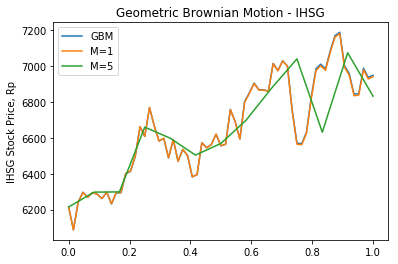

In [26]:
# Exact solution - GBM Model
seed = 200
So = adj_close[0]            # Initial IHSG
W = brownian(seed, N)[0]
T = 1.
N = 2.**6

sol = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, sol, label = 'GBM')


# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt


# Changing the time step sizes
#

b = brownian(200, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,L+1)

b = brownian(200, N)[1]    # Brownian increments 
M = 5                    
L = N/M
EM_approx_2 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_2 = np.linspace(0.,1.,L+1)

plt.plot(time_EM_1, EM_approx_1, label = 'M=1')
plt.plot(time_EM_2, EM_approx_2, label = 'M=5')


plt.ylabel('IHSG Stock Price, Rp')
plt.title('Geometric Brownian Motion - IHSG')

plt.legend(loc = 'upper left')
